# **Set up**

*This* project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

**It** also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

**And** TensorFlow ≥ 2.8:

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Regression MLPs (Multi-Layer Perceptron)

In [ ]:
# Import necessary libraries and modules
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Create an MLPRegressor with 3 hidden layers, each containing 50 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# Create a StandardScaler for feature scaling
scaler = StandardScaler()

# Create a pipeline that first scales the features using StandardScaler
# and then applies the MLPRegressor
pipeline = make_pipeline(scaler, mlp_reg)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_valid)

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print(rmse)


0.5053326657968679


# Implementing MLPs with Keras


In [5]:
# Import necessary libraries and modules
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [6]:
# Load the California housing dataset
housing = fetch_california_housing()

## **Dataset Insights**

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## **Test, Train and Validation split**


In [7]:
# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [8]:
# Standardize the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

## **Build Model**

## **Early Stopping - CallBack**

In [9]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# **First Training**


*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = relu
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Random
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [10]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelrsr.h5", save_best_only=True)

## **SGD optimizer**

In [11]:
# Model with SGD optimizer
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [12]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [13]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


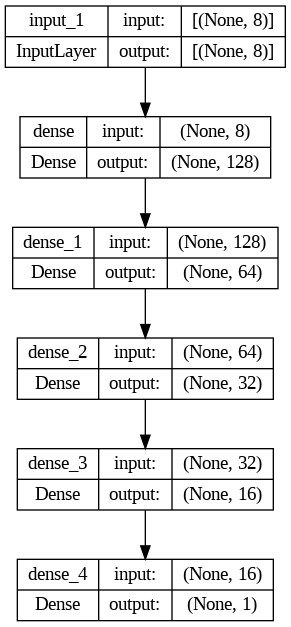

In [14]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [15]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7064 - mae: 0.5936 - val_loss: 4.1550 - val_mae: 0.4994
Epoch 2/50
129/363 [=========>....................] - ETA: 0s - loss: 0.4438 - mae: 0.4724

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 2ms/step - loss: 0.4000 - mae: 0.4507 - val_loss: 0.6183 - val_mae: 0.4239
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3711 - mae: 0.4271 - val_loss: 1.5690 - val_mae: 0.4239
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3539 - mae: 0.4141 - val_loss: 0.3330 - val_mae: 0.4098
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3322 - mae: 0.4045 - val_loss: 0.3737 - val_mae: 0.3889
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3276 - mae: 0.4005 - val_loss: 0.3293 - val_mae: 0.3831
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3225 - mae: 0.3974 - val_loss: 0.4289 - val_mae: 0.3844
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3170 - mae: 0.3926 - val_loss: 0.2992 - val_mae: 0.3856
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3112 - mae:

In [16]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [17]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


### **Plotting the Training and Prediction insights**

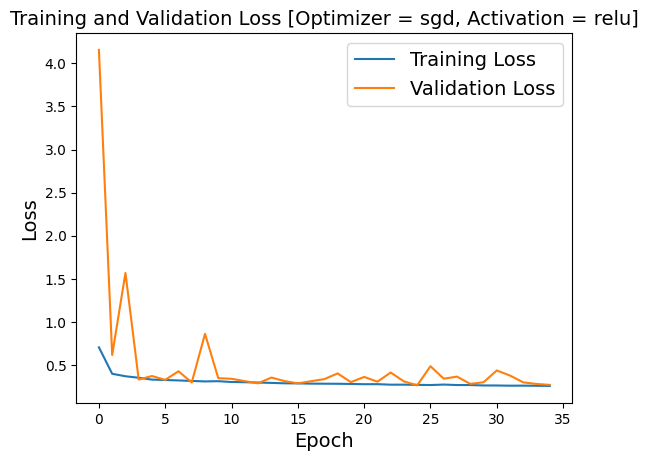

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = relu].png')

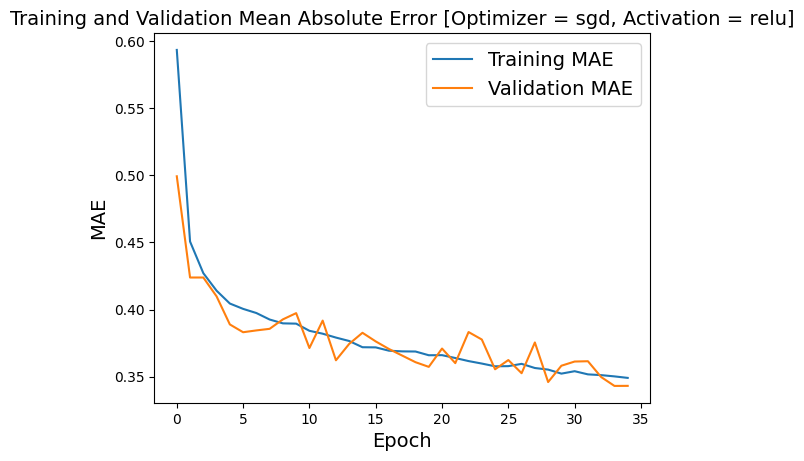

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = relu].png')

## **Model Checkpoint - CallBack**

In [20]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelrar.h5", save_best_only=True)

## **ADAM optimizer**

In [21]:
# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [22]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [23]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


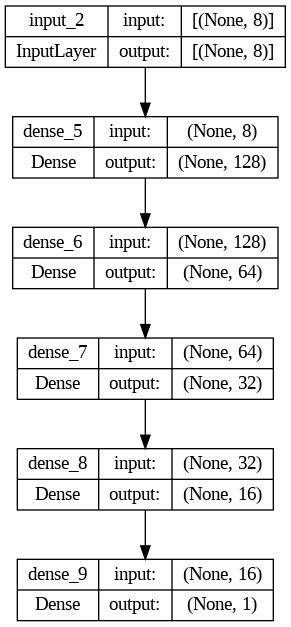

In [24]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [25]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 2s 2ms/step - loss: 1.0361 - mae: 0.6839 - val_loss: 2.6781 - val_mae: 0.4736
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - mae: 0.4418 - val_loss: 0.5244 - val_mae: 0.4119
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3614 - mae: 0.4203 - val_loss: 0.3276 - val_mae: 0.4032
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3471 - mae: 0.4121 - val_loss: 0.3785 - val_mae: 0.4236
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3356 - mae: 0.4040 - val_loss: 0.4070 - val_mae: 0.3964
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3226 - mae: 0.3951 - val_loss: 0.4885 - val_mae: 0.3925
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3111 - mae: 0.3863 - val_loss: 0.3644 - val_mae: 0.4092
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [26]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [27]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


### **Plotting the Training and Prediction insights**

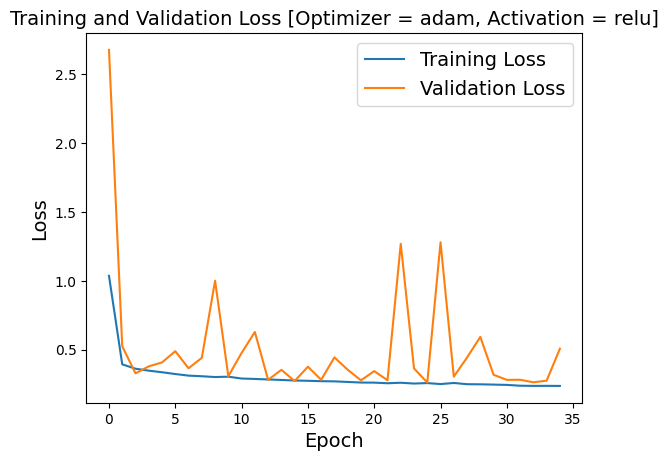

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu].png')

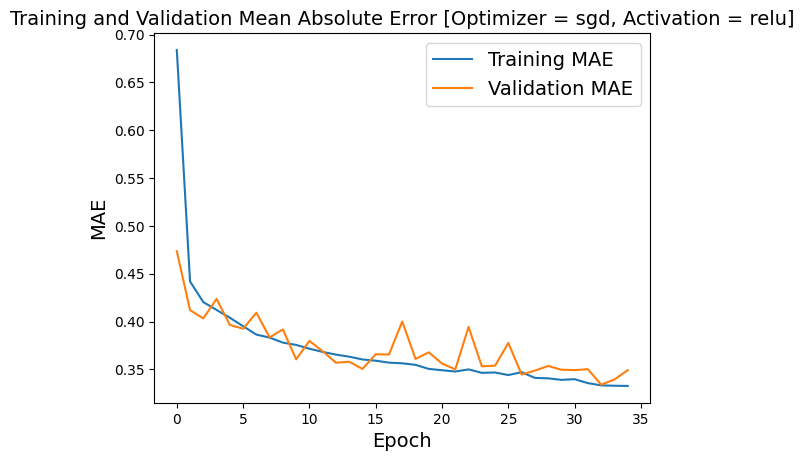

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot training history
plt.plot(adam_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(adam_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = adam, Activation = relu].png')

# Part 2
*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = **sigmoid**
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Random
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [30]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelssr.h5", save_best_only=True)

## **SGD optimizer**

In [31]:
# Model with SGD optimizer
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [32]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [33]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


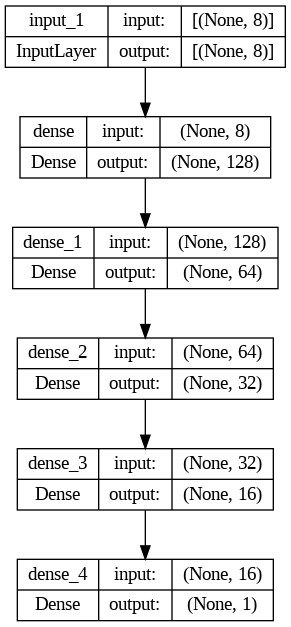

In [34]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [35]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3480 - mae: 0.9185 - val_loss: 1.3141 - val_mae: 0.9057
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3399 - mae: 0.9175 - val_loss: 1.3104 - val_mae: 0.8994
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3375 - mae: 0.9163 - val_loss: 1.3099 - val_mae: 0.9051
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 1.3354 - mae: 0.9157 - val_loss: 1.3050 - val_mae: 0.8946
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3324 - mae: 0.9141 - val_loss: 1.3252 - val_mae: 0.9301
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3268 - mae: 0.9134 - val_loss: 1.3065 - val_mae: 0.9142
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3218 - mae: 0.9115 - val_loss: 1.2891 - val_mae: 0.8927
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 1.

In [36]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [37]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

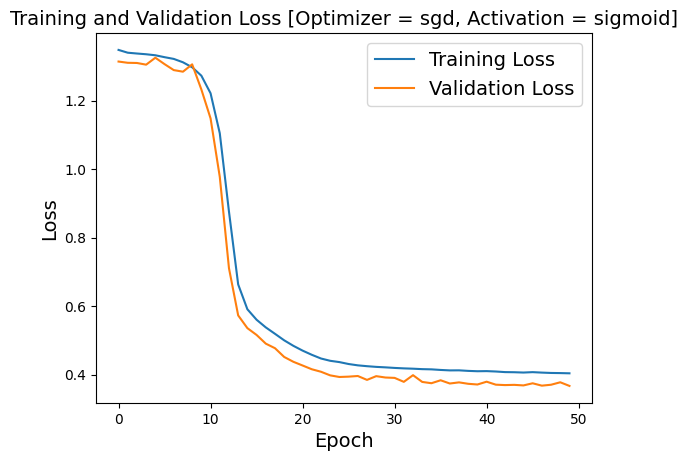

<Figure size 640x480 with 0 Axes>

In [38]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid].png')

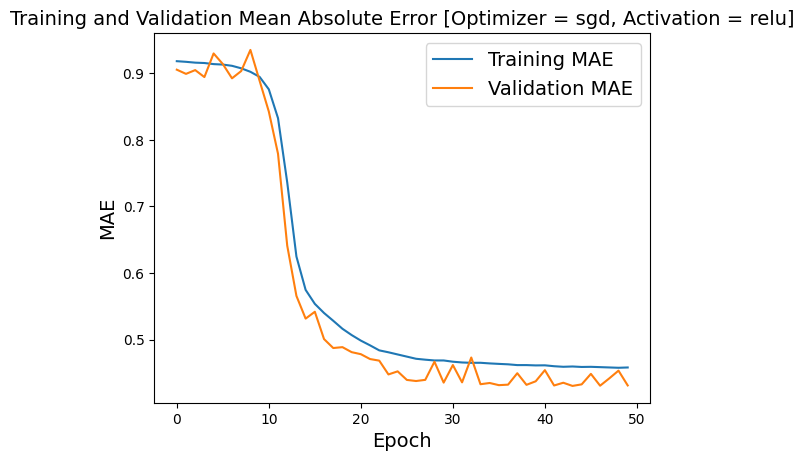

<Figure size 640x480 with 0 Axes>

In [39]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = sigmoid].png')

## **Model Checkpoint - CallBack**

In [40]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelsar.h5", save_best_only=True)

## **ADAM optimizer**

In [41]:
# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid'),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid'),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid'),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [42]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [43]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


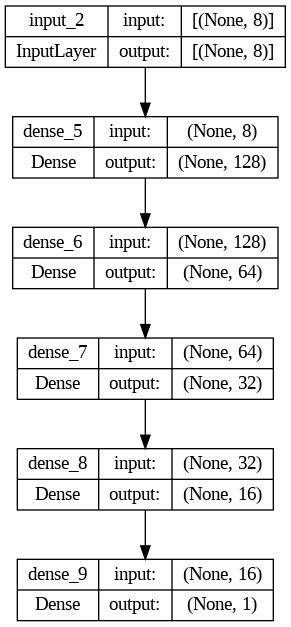

In [44]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [45]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.5780 - mae: 0.9623 - val_loss: 1.3083 - val_mae: 0.9051
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 1.0620 - mae: 0.7795 - val_loss: 0.5812 - val_mae: 0.5476
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4997 - mae: 0.5200 - val_loss: 0.4149 - val_mae: 0.4734
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4278 - mae: 0.4839 - val_loss: 0.4012 - val_mae: 0.4772
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4068 - mae: 0.4680 - val_loss: 0.3662 - val_mae: 0.4348
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3948 - mae: 0.4562 - val_loss: 0.3921 - val_mae: 0.4720
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3885 - mae: 0.4513 - val_loss: 0.3541 - val_mae: 0.4159
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [46]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [47]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

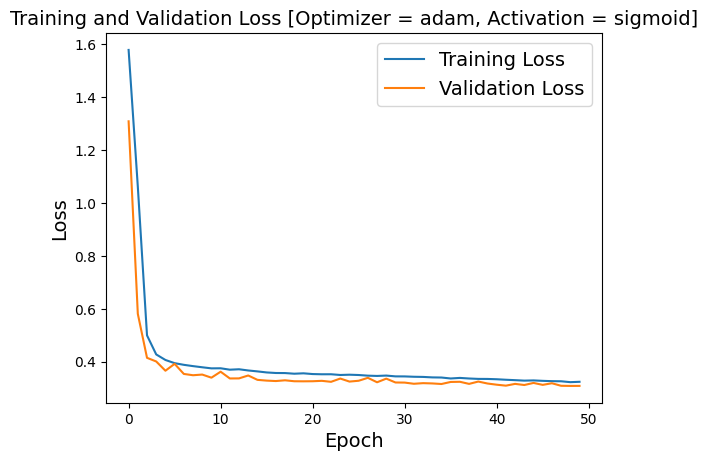

<Figure size 640x480 with 0 Axes>

In [48]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = sigmoid]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu].png')

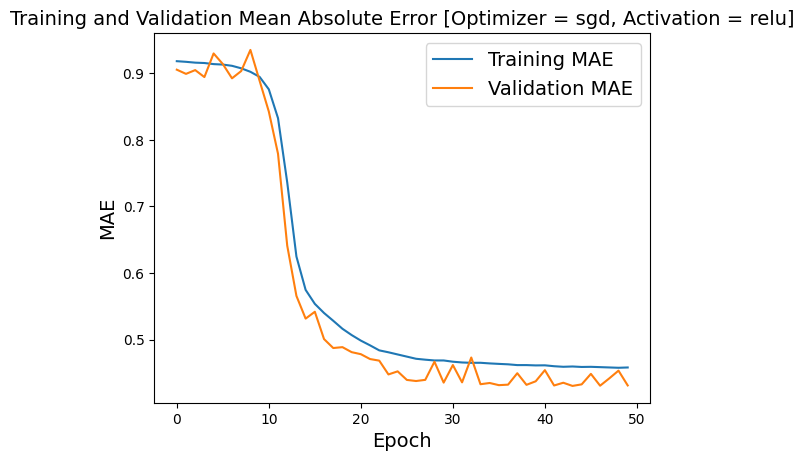

<Figure size 640x480 with 0 Axes>

In [49]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = adam, Activation = sigmoid].png')

# **Second Training**


*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = relu
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Specific
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [50]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelrss.h5", save_best_only=True)

## **SGD optimizer**

In [51]:
# Model with SGD optimizer
custom_initializer = tf.keras.initializers.Constant(value=0.01)
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu',  kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu',  kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [52]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [53]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


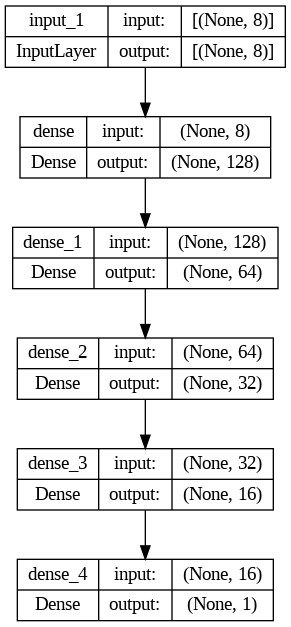

In [54]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [55]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.1991 - mae: 0.8355 - val_loss: 0.5905 - val_mae: 0.5799
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5265 - mae: 0.5381 - val_loss: 0.4158 - val_mae: 0.4710
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4492 - mae: 0.4883 - val_loss: 0.4175 - val_mae: 0.4794
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - mae: 0.4842 - val_loss: 0.4006 - val_mae: 0.4687
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4414 - mae: 0.4834 - val_loss: 0.4025 - val_mae: 0.4618
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4376 - mae: 0.4825 - val_loss: 0.4008 - val_mae: 0.4666
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4389 - mae: 0.4830 - val_loss: 0.3942 - val_mae: 0.4569
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [56]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [57]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### **Plotting the Training and Prediction insights**

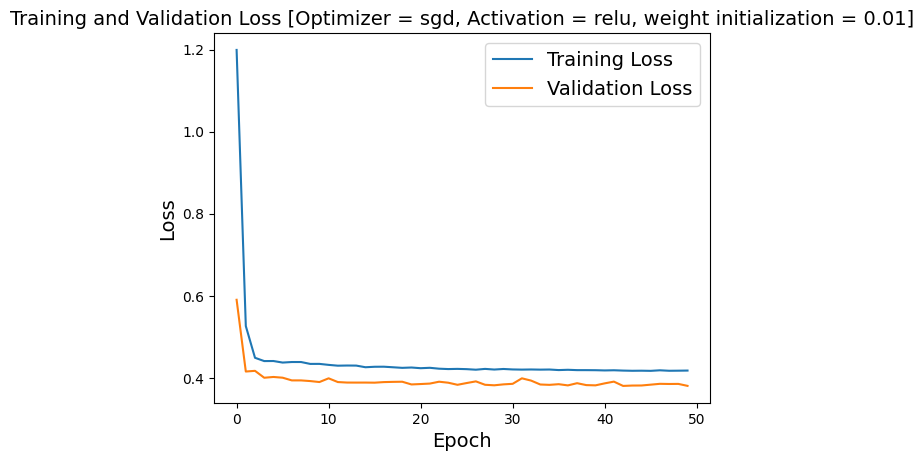

<Figure size 640x480 with 0 Axes>

In [58]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = relu, weight initialization = 0.01].png')

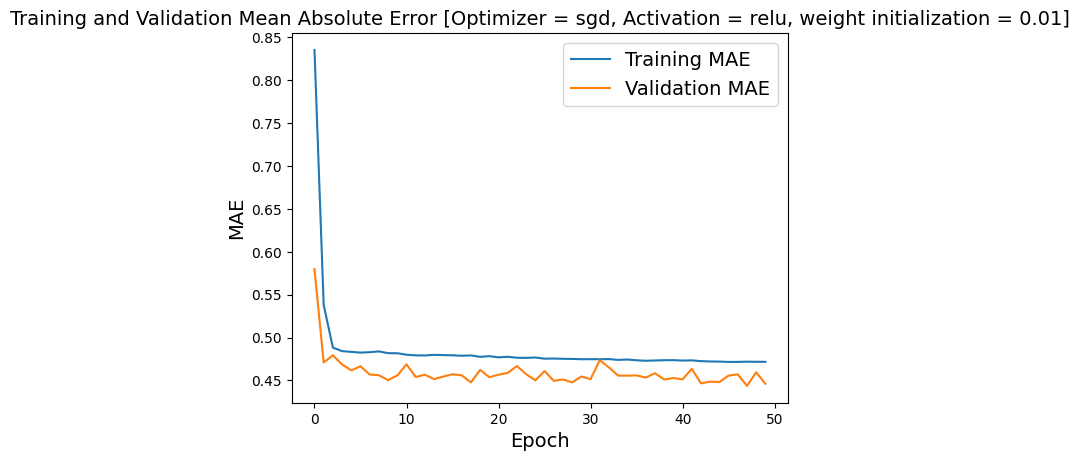

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = relu, weight initialization = 0.01].png')

## **Model Checkpoint - CallBack**

In [60]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelras.h5", save_best_only=True)

## **ADAM optimizer**

In [61]:
custom_initializer = tf.keras.initializers.Constant(value=0.01)
# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='relu', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='relu', kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='relu', kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [62]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [63]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


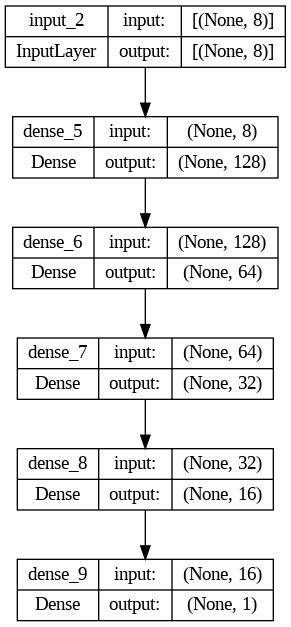

In [64]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [65]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 2s 2ms/step - loss: 1.0367 - mae: 0.6989 - val_loss: 0.4219 - val_mae: 0.4795
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4740 - mae: 0.4967 - val_loss: 0.4099 - val_mae: 0.4701
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4637 - mae: 0.4947 - val_loss: 0.4188 - val_mae: 0.4734
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4575 - mae: 0.4933 - val_loss: 0.4059 - val_mae: 0.4582
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4613 - mae: 0.4942 - val_loss: 0.4023 - val_mae: 0.4631
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4576 - mae: 0.4931 - val_loss: 0.4039 - val_mae: 0.4641
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4591 - mae: 0.4934 - val_loss: 0.4046 - val_mae: 0.4600
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [66]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [67]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


### **Plotting the Training and Prediction insights**

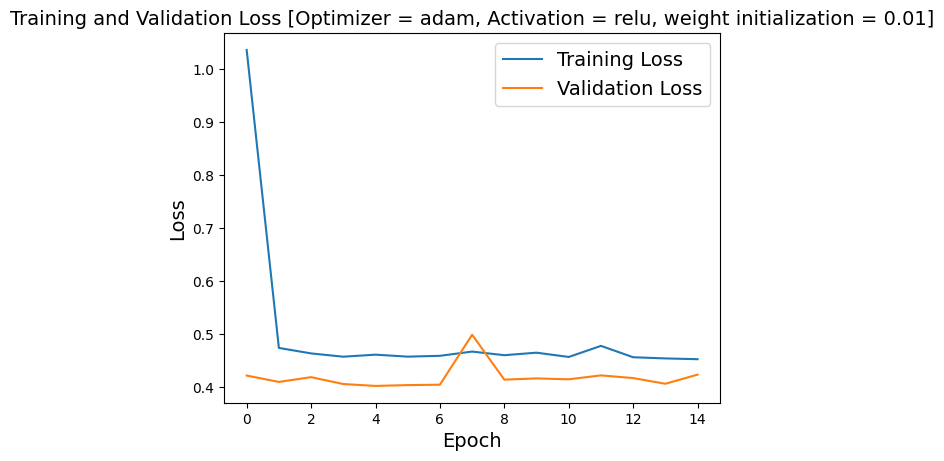

<Figure size 640x480 with 0 Axes>

In [68]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu, weight initialization = 0.01].png')

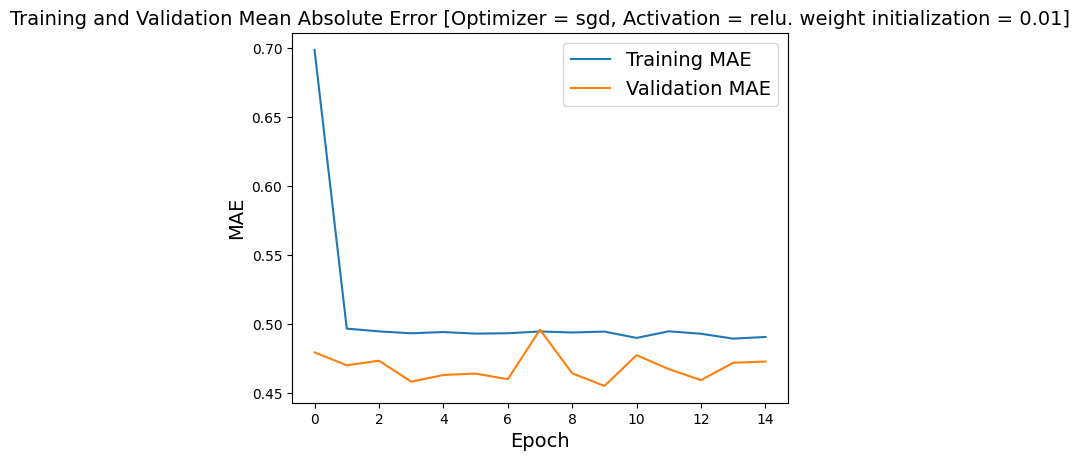

<Figure size 640x480 with 0 Axes>

In [69]:
# Plot training history
plt.plot(adam_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(adam_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu. weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = adam, Activation = relu, weight initialization = 0.001].png')

# Part 2
*   4 Layers (128, 64, 32, 16 and 8)
*   Activation = **sigmoid**
*   Optimizer
*   Adam & SGD
*   Weight Initialization = Specific
*   Learning Rate = 0.01
*   Batch Size = 32








## **Model Checkpoint - CallBack**

In [70]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelsss.h5", save_best_only=True)

## **SGD optimizer**

In [71]:
custom_initializer = tf.keras.initializers.Constant(value=0.01)

# Model with SGD optimizer
sgd_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid',  kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid',  kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid',  kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid',  kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [72]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

sgd_model.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [73]:
sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


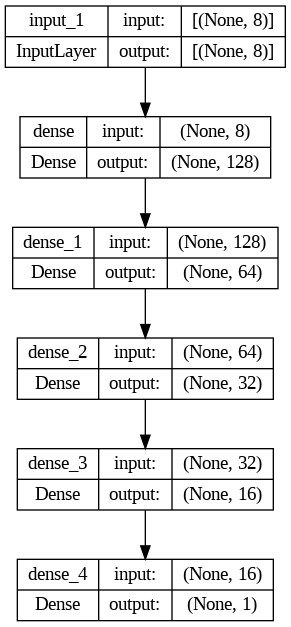

In [74]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(sgd_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [75]:
# Train the model on the scaled training data with callbacks
sgd_model_history = sgd_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.4007 - mae: 0.9300 - val_loss: 1.3159 - val_mae: 0.9050
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3441 - mae: 0.9183 - val_loss: 1.3147 - val_mae: 0.8995
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3440 - mae: 0.9187 - val_loss: 1.3164 - val_mae: 0.8906
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3444 - mae: 0.9182 - val_loss: 1.3380 - val_mae: 0.9337
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3428 - mae: 0.9181 - val_loss: 1.3159 - val_mae: 0.9051
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3441 - mae: 0.9185 - val_loss: 1.3153 - val_mae: 0.8936
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3429 - mae: 0.9177 - val_loss: 1.3239 - val_mae: 0.9187
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 1.

In [76]:
sgd_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [77]:
print(sgd_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


### **Plotting the Training and Prediction insights**

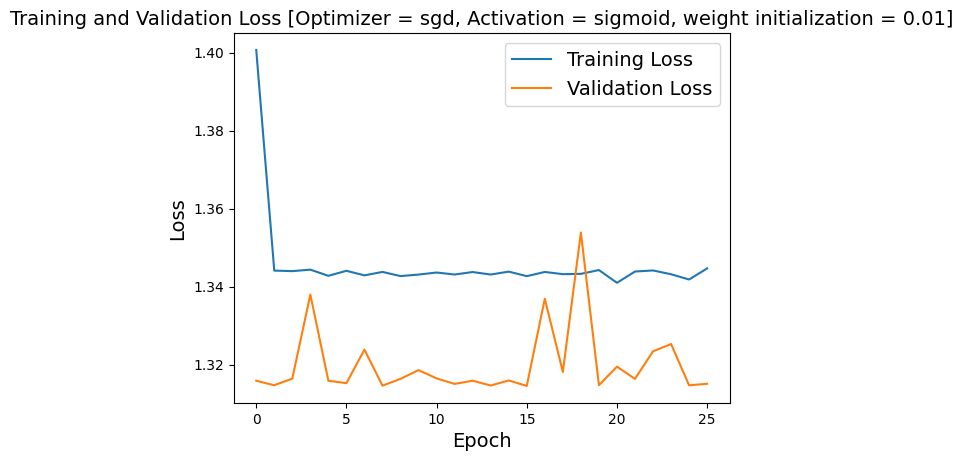

<Figure size 640x480 with 0 Axes>

In [80]:
# Plot training history
plt.plot(sgd_model_history.history['loss'], label='Training Loss')
plt.plot(sgd_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = sgd, Activation = sigmoid].png, weight initialization = 0.01].png')

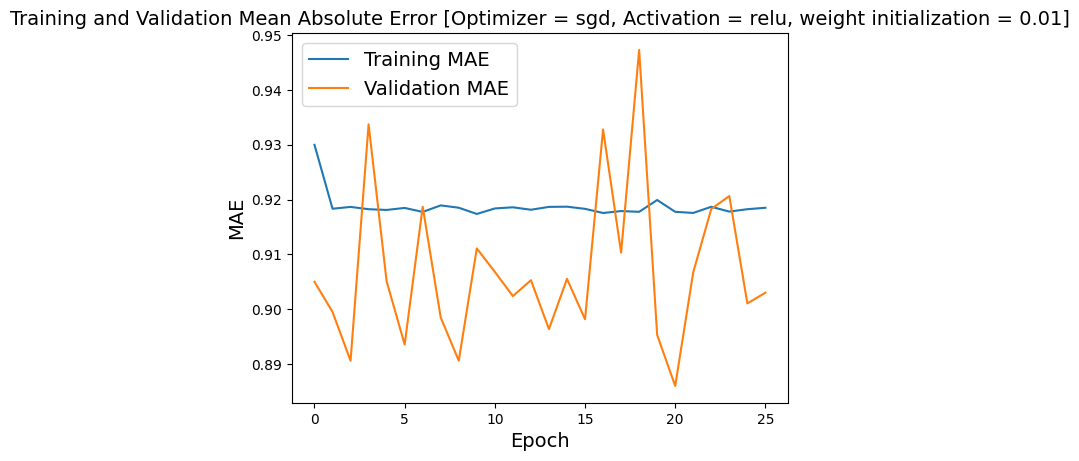

<Figure size 640x480 with 0 Axes>

In [81]:
# Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Mean Absolute Error [Optimizer = sgd, Activation = sigmoid, weight initialization = 0.01].png')

## **Model Checkpoint - CallBack**

In [82]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_modelsas.h5", save_best_only=True)

## **ADAM optimizer**

In [83]:
custom_initializer = tf.keras.initializers.Constant(value=0.01)

# Model with Adam optimizer
adam_model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(units=128, activation='sigmoid', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=64, activation='sigmoid', kernel_initializer=custom_initializer),  # Hidden layer with 64 neurons and 'relu' activation
    layers.Dense(units=32, activation='sigmoid', kernel_initializer=custom_initializer),  # Another hidden layer with 32 neurons and 'relu' activation
    layers.Dense(units=16, activation='sigmoid', kernel_initializer=custom_initializer),  # Another hidden layer with 16 neurons and 'relu' activation
    layers.Dense(units=1)  # Output layer (1 neuron for regression)
])


### **Model Parameters - Build**


In [84]:
tf.keras.backend.clear_session()

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_model.compile(optimizer=adam_optimizer, loss='mean_squared_error', metrics=['mae'])


### **Model Summary**

In [85]:
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


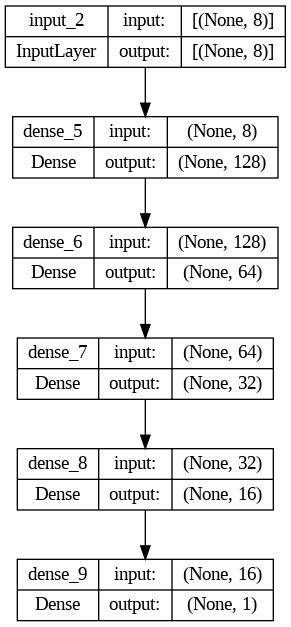

In [86]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(adam_model, "my_california_housing_prediction_model.png", show_shapes=True)

### **Model Training**

In [87]:
# Train the model on the scaled training data with callbacks
adam_model_history = adam_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 2.0206 - mae: 1.0660 - val_loss: 1.3147 - val_mae: 0.9021
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3386 - mae: 0.9158 - val_loss: 1.3076 - val_mae: 0.9040
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 1.2867 - mae: 0.8919 - val_loss: 1.1980 - val_mae: 0.8577
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 1.1271 - mae: 0.8253 - val_loss: 0.9799 - val_mae: 0.7588
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.8664 - mae: 0.7079 - val_loss: 0.7151 - val_mae: 0.6411
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6443 - mae: 0.6043 - val_loss: 0.5501 - val_mae: 0.5588
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5469 - val_loss: 0.4665 - val_mae: 0.5122
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [88]:
adam_model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [89]:
print(adam_model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


### **Plotting the Training and Prediction insights**

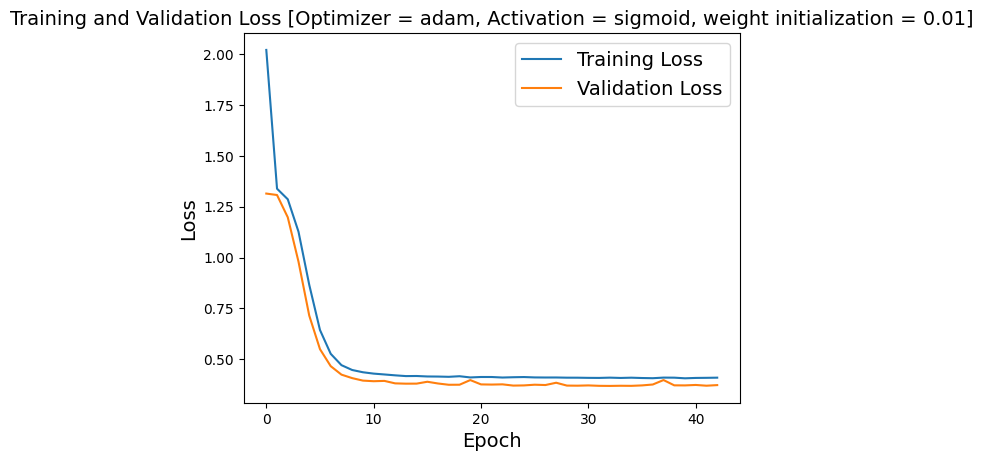

<Figure size 640x480 with 0 Axes>

In [90]:
# Plot training history
plt.plot(adam_model_history.history['loss'], label='Training Loss')
plt.plot(adam_model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss [Optimizer = adam, Activation = sigmoid, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the plot
plt.savefig('Training and Validation Loss [Optimizer = adam, Activation = relu, weight initialization = 0.01].png')

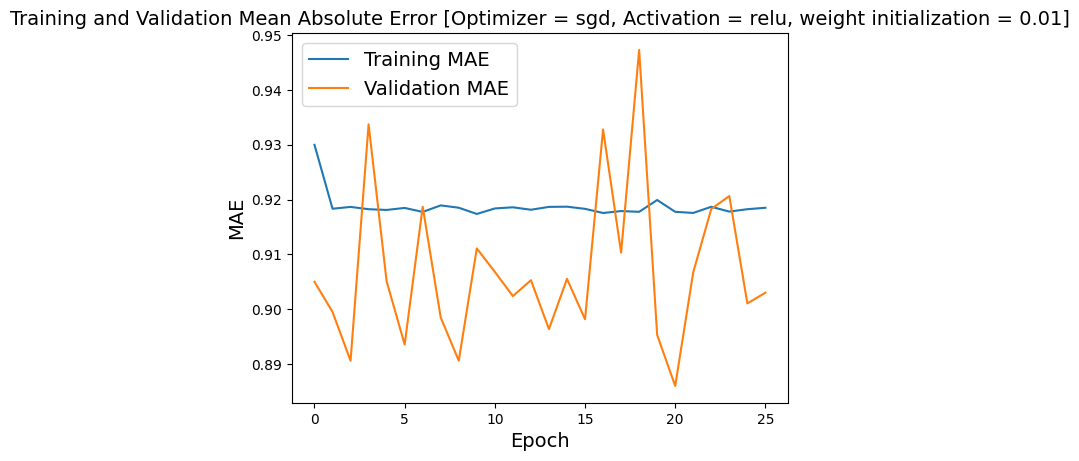

<Figure size 640x480 with 0 Axes>

In [92]:
    # Plot training history
plt.plot(sgd_model_history.history['mae'], label='Training MAE')  # Use 'mae' instead of 'accuracy'
plt.plot(sgd_model_history.history['val_mae'], label='Validation MAE')  # Use 'val_mae' instead of 'val_accuracy'
plt.title('Training and Validation Mean Absolute Error [Optimizer = sgd, Activation = relu, weight initialization = 0.01]')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Save the plot
plt.savefig('a.png')